In [21]:
import acquire
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = acquire.get_wine()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model.train_validate_test_dummy(df, 'quality')

In [5]:
pd.DataFrame(y_train)
pd.DataFrame(y_validate)
pd.DataFrame(y_test)

,quality
1321,6
1168,5
3470,8
4181,6
547,6
...,...
301,6
1430,4
1375,5
198,7


In [6]:
X_train_scaled, X_validate_scaled, X_test_scaled = model.scale_data(X_train, X_validate, X_test)

In [7]:
X_train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
0,0.140496,0.106667,0.192771,0.124233,0.080268,0.062500,0.219400,0.132832,0.417323,0.050562,0.347826,1.0
1,0.338843,0.160000,0.307229,0.018405,0.550167,0.055556,0.113164,0.188741,0.236220,0.483146,0.173913,0.0
2,0.280992,0.106667,0.240964,0.012270,0.055184,0.104167,0.228637,0.082707,0.110236,0.089888,0.405797,1.0
3,0.429752,0.140000,0.204819,0.176380,0.030100,0.114583,0.392610,0.191826,0.307087,0.140449,0.376812,1.0
4,0.545455,0.240000,0.439759,0.091258,0.103679,0.128472,0.159353,0.229227,0.338583,0.353933,0.579710,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3632,0.107438,0.086667,0.168675,0.012270,0.058528,0.163194,0.325635,0.088105,0.598425,0.151685,0.347826,1.0
3633,0.206612,0.113333,0.265060,0.168712,0.048495,0.163194,0.434180,0.186813,0.346457,0.168539,0.217391,1.0
3634,0.289256,0.160000,0.150602,0.101227,0.073579,0.159722,0.399538,0.173318,0.267717,0.140449,0.115942,1.0
3635,0.289256,0.113333,0.174699,0.105828,0.061873,0.128472,0.348730,0.181029,0.543307,0.089888,0.231884,1.0


In [8]:
X_train_3_features = X_train_scaled[['residual sugar', 'total sulfur dioxide', 'alcohol']]
X_train_3_features

,residual sugar,total sulfur dioxide,alcohol
0,0.124233,0.219400,0.347826
1,0.018405,0.113164,0.173913
2,0.012270,0.228637,0.405797
3,0.176380,0.392610,0.376812
4,0.091258,0.159353,0.579710
...,...,...,...
3632,0.012270,0.325635,0.347826
3633,0.168712,0.434180,0.217391
3634,0.101227,0.399538,0.115942
3635,0.105828,0.348730,0.231884


In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_3_features)

kmeans.predict(X_train_3_features)

array([1, 2, 1, ..., 0, 0, 2], dtype=int32)

In [10]:
X_train['3_cluster'] = kmeans.predict(X_train_3_features)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,3_cluster
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,1
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,2
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,1
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,1
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,1
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,0
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,0
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,0


In [11]:
combined = pd.concat([X_train, y_train], axis=1)
combined.groubby('3_cluster')

AttributeError: 'DataFrame' object has no attribute 'groubby'

In [ ]:
sns.pairplot(X_train,  x_vars=['residual sugar', 'total sulfur dioxide', 'alcohol'] , y_vars=['residual sugar', 'total sulfur dioxide', 'alcohol'], hue='3_cluster')

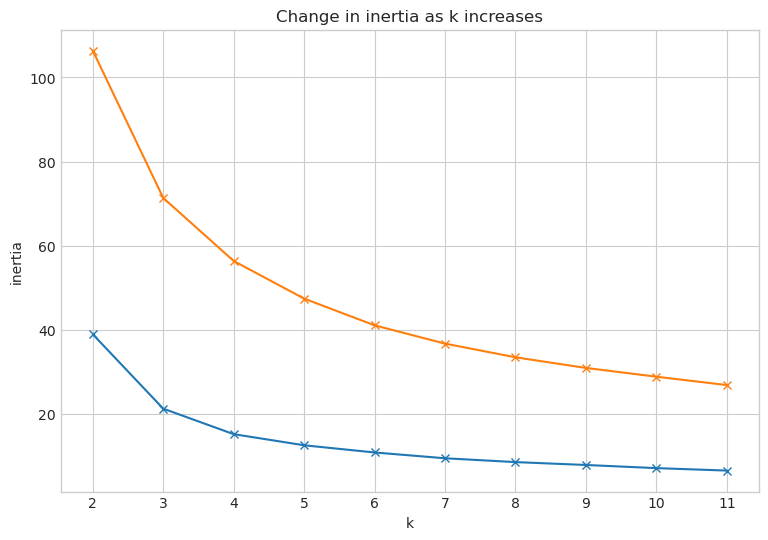

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_scaled[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     pd.Series({k: KMeans(k).fit(X_train_scaled[['density', 'alcohol', 'volatile acidity']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     pd.Series({k: KMeans(k).fit(X_train_scaled[['density', 'alcohol', 'volatile acidity', 'chlorides']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     pd.Series({k: KMeans(k).fit(X_train_scaled[['sulphates', 'pH', 'density']]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     pd.Series({k: KMeans(k).fit(X_train_scaled[['sulphates', 'pH', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
    pd.Series({k: KMeans(k).fit(X_train_scaled[['residual sugar', 'alcohol', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [13]:
X_train_cluster_0 = X_train[X_train['3_cluster'] == 0]
X_train_cluster_0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,3_cluster
2414,6.2,0.38,0.18,7.4,0.095,28.0,195.0,0.99773,3.53,0.71,9.2,1,0
4639,6.9,0.54,0.26,12.7,0.049,59.0,195.0,0.99596,3.26,0.54,10.5,1,0
1961,9.5,0.21,0.47,1.3,0.039,21.0,123.0,0.99590,2.90,0.64,9.5,1,0
1704,6.7,0.31,0.42,6.4,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,1,0
235,7.2,0.23,0.38,14.3,0.058,55.0,194.0,0.99790,3.09,0.44,9.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,10.2,0.44,0.88,6.2,0.049,20.0,124.0,0.99680,2.99,0.51,9.9,1,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0
1943,6.3,0.25,0.44,11.6,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,0
285,7.3,0.32,0.25,7.2,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,0


In [14]:
y_train

2138    5
19      6
601     6
2540    5
501     7
       ..
3319    5
1943    5
285     5
607     5
548     6
Name: quality, Length: 3637, dtype: int64

In [15]:
X_train_cluster_1 = X_train[X_train['3_cluster'] == 1]
X_train_cluster_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,3_cluster
2138,5.5,0.24,0.32,8.7,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,1
601,7.2,0.24,0.40,1.4,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,1
2540,9.0,0.29,0.34,12.1,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,1
2220,7.0,0.22,0.32,1.6,0.045,40.0,120.0,0.99140,2.98,0.44,10.5,1,1
742,7.0,0.20,0.37,2.0,0.030,26.0,136.0,0.99320,3.28,0.61,10.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,5.5,0.12,0.33,1.0,0.038,23.0,131.0,0.99164,3.25,0.45,9.8,1,1
4860,6.0,0.52,0.33,7.7,0.046,24.0,119.0,0.99224,3.04,0.38,11.0,1,1
1969,6.3,0.41,0.30,3.2,0.030,49.0,164.0,0.99270,3.53,0.79,11.7,1,1
4506,6.6,0.19,0.28,1.1,0.044,38.0,100.0,0.99040,3.22,0.69,11.2,1,1


In [16]:
X_train_cluster_2 = X_train[X_train['3_cluster'] == 2]
X_train_cluster_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,3_cluster
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,2
117,7.8,0.560,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4,0,2
1265,7.2,0.570,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,0,2
175,6.9,0.500,0.04,1.5,0.085,19.0,49.0,0.99580,3.35,0.78,9.5,0,2
625,6.8,0.690,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.4,0,2
237,7.2,0.645,0.00,1.9,0.097,15.0,39.0,0.99675,3.37,0.58,9.2,0,2
226,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,0,2
582,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2,0,2


In [17]:
X_train_cluster_3 = X_train[X_train['3_cluster'] == 3]
X_train_cluster_3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,3_cluster
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,3
1344,7.3,0.23,0.37,1.90,0.041,51.0,165.0,0.99080,3.26,0.40,12.2,1,3
2778,7.6,0.39,0.32,3.60,0.035,22.0,93.0,0.99144,3.08,0.60,12.5,1,3
1549,7.4,0.36,0.30,1.80,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,0,3
711,8.2,0.27,0.43,1.60,0.035,31.0,128.0,0.99160,3.10,0.50,12.3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,7.1,0.37,0.30,6.20,0.040,49.0,139.0,0.99021,3.17,0.27,13.6,1,3
4697,6.7,0.35,0.32,9.00,0.032,29.0,113.0,0.99188,3.13,0.65,12.9,1,3
4169,6.7,0.21,0.34,1.50,0.035,45.0,123.0,0.98949,3.24,0.36,12.6,1,3
2912,6.5,0.22,0.32,2.20,0.028,36.0,92.0,0.99076,3.27,0.59,11.9,1,3


In [22]:
# turn series into dataframes to append new columns with predicted values
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

# 1. Predict based on mean
quality_pred_mean = y_train['quality'].mean()
y_train['quality_pred_mean'] = quality_pred_mean
y_validate['quality_pred_mean'] = quality_pred_mean

# 2. Do same for median
quality_pred_median_mvp = y_train['quality'].median()
y_train['quality_pred_median'] = quality_pred_median_mvp
y_validate['quality_pred_median'] = quality_pred_median_mvp

# 3.  RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2)) 

# 4.  RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_median) ** (1/2)
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_median) ** (1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  0.87 
Validate/Out-of-Sample:  0.89
RMSE using Median
Train/In-Sample:  0.89 
Validate/Out-of-Sample:  0.91
